In [49]:
# -*- coding: utf-8 -*-
# apriori
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('son1.csv',encoding='utf-8')
# df = pd.read_csv('son.csv',encoding='cp949')
df.head()

,Unnamed: 0,created,tweet_text
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...
2,2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...
3,3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
4,4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영...


In [51]:
# df.to_csv('son1.csv',encoding = 'utf-8')

In [52]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 정규표현식 적용
    result = hangul.sub('', text)
    return result


In [53]:
# ‘tweet_text’ 컬럼에 이를 적용.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,Unnamed: 0,created,tweet_text,ko_text
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...
2,2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...,팬문선답 타래 손흥민
3,3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...
4,4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영...,함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영...


[konlpy를 이용한 키워드 추출]

In [69]:
from konlpy.tag import Okt
# 글자 카운트 함수 https://www.daleseo.com/python-collections-counter/
from collections import Counter

# 한국어 약식 불용어사전 예시 파일. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
# 공백제거 후 list   
stopwords = [x.strip() for x in stopwords]

# 형태소 분석
def get_nouns(x):
    nouns_tagger = Okt()
    # 명사 추출 - list
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [70]:
stopwords[:5]

['가', '가까스로', '가령', '각', '각각']

In [56]:
# ko_text 컬럼 저장.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1000, 5)


,Unnamed: 0,created,tweet_text,ko_text,nouns
0,0,Sat Jun 12 07:28:52 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,"[가슴, 경주, 대구, 마사, 마산, 부산, 소통, 야동, 인천, 최신영, 손흥민,..."
1,1,Sat Jun 12 07:17:25 +0000 2021,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁...,"[코인, 세탁소, 산업혁명, 셀프, 사이트, 인공, 지능, 빨래, 손흥민, 그래핀,..."
2,2,Sat Jun 12 07:12:41 +0000 2021,RT @sonny_record: 210611 팬문선답 타래 #손흥민 https://...,팬문선답 타래 손흥민,"[문선, 타래, 손흥민]"
3,3,Sat Jun 12 07:08:51 +0000 2021,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅...,"[가슴, 경주, 대구, 마사, 마산, 부산, 소통, 야동, 인천, 최신영, 손흥민,..."
4,4,Sat Jun 12 06:58:57 +0000 2021,함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영...,함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영...,"[함평, 축구선수, 장짐, 최신영, 증거, 손흥민, 축구, 남양, 야설, 스타킹, ..."


<Step3. 분석> : 연관 분석을 이용한 키워드 분석
* [연관 키워드 추출하기]

1.아래 코드 실행을 위해 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.

(env_name) pip install apriori apyori

2.혹은 아래의 코드로 라이브러리를 설치합니다.

In [57]:
# 샘플을 가지고 실습
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['손흥민', '시소코'],
    ['손흥민', '케인'],
    ['손흥민', '케인', '포체티노']
]
# transactions = [
#     ['손흥민', '시소코','토토넘'],
#     ['손흥민', '케인','알리'],
#     ['손흥민', '케인', '포체티노']
# ]

# 연관 분석을 수행.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [58]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 
# (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출.
results2 = list(apriori(transactions,
             min_support=0.5,  # 지지도 0.5
             min_confidence=0.6,  # 신뢰도 0.6
             min_lift=1.0,        # 향상도 1.0
             max_length=2))       # 크기 2 이하, 3개단어묶음은 안됨.
results2

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

In [59]:
# 데이터 프레임 형태로 정리합니다. - 기저귀를 구매할때 맥주를 함께 구매하는 비율
# 조건절,결과절,지지도,신뢰도 까지 출력
columns = ['source', 'target', 'support','confidence','lift']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support, result.ordered_statistics[1][2],result.ordered_statistics[1][3]]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support,confidence,lift
0,손흥민,시소코,0.333333,0.333333,1.0
1,손흥민,케인,0.666667,0.666667,1.0
2,포체티노,손흥민,0.333333,0.333333,1.0
3,포체티노,케인,0.333333,0.5,1.5


원하는 단어 검색

In [60]:
# 원하는 단어 검색, 손흥민 target 인것만 출력
test = network_df[network_df['source']=='손흥민']
# test = network_df[network_df['target']=='손흥민']
# support 역순정렬
test.sort_values(by='support',ascending=False)

,source,target,support,confidence,lift
1,손흥민,케인,0.666667,0.666667,1.0
0,손흥민,시소코,0.333333,0.333333,1.0


트위터 연관 키워드 분석

In [61]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
# 공백 문자열을 방지 - 데이터가 있는 것만 저장
transactions = [transaction for transaction in transactions if transaction] 
print(transactions)

[['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['코인', '세탁소', '산업혁명', '셀프', '사이트', '인공', '지능', '빨래', '손흥민', '그래핀', '지도', '강남구', '광고', '세탁소', '브레이커', '사람인', '심장', '강대국', '블로그', '사물인터넷', '당뇨', '지식인', '스트레스', '빅데이터'], ['문선', '타래', '손흥민'], ['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['함평', '축구선수', '장짐', '최신영', '증거', '손흥민', '축구', '남양', '야설', '스타킹', '장성', '패티', '영광', '마사지', '진도', '야사', '아줌마', '연남동', '야동', '포항', '발정', '아줌마', '서울', '부산', '대구인', '완도', '동영상', '남양', '소통', '신안', '케이', '서울', '야노'], ['가슴', '경주', '대구', '마사', '마산', '부산', '소통', '야동', '인천', '최신영', '손흥민', '만남', '소개팅', '패티', '만남', '어플', '스타킹', '축구', '축구선수', '울산', '아줌마', '마사지', '스타킹', '동영상', '애무'], ['카테고리', '프리', '메라', '브라질', '축구', '콜롬비아', '리그', '다드', '축구선수', '브라', '플라멩구', '콜롬비아', '축구', '스포츠토토', '라이브', '스코어', '

In [62]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.05,   # 지지도
                       min_confidence=0.1, # 신뢰도
                       min_lift=5,         # 향상도
                       max_length=2))      # 최대크기 2이하
print(results)

[RelationRecord(items=frozenset({'국가대표팀', '국가'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=14.617647058823529), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'국가'}), confidence=0.9852941176470588, lift=14.617647058823529)]), RelationRecord(items=frozenset({'국가', '김신욱'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'김신욱'}), confidence=1.0, lift=7.705426356589148), OrderedStatistic(items_base=frozenset({'김신욱'}), items_add=frozenset({'국가'}), confidence=0.5193798449612403, lift=7.705426356589148)]), RelationRecord(items=frozenset({'대한민국', '국가'}), support=0.06740442655935613, ordered_statistics=[OrderedStatistic(items_base=frozenset({'국가'}), items_add=frozenset({'대한민국'}), confidence=1.0, lift=13.432432432432432), OrderedStatistic(items_base=frozenset({'대한민국'}), items_add=frozenset({'국가'})

In [63]:
# 데이터 프레임 형태로 정리합니다. - 기저귀를 구매할때 맥주를 함께 구매하는 비율
# 조건절,결과절,지지도,신뢰도 까지 출력
columns = ['source', 'target', 'support','confidence','lift']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support, result.ordered_statistics[1][2],result.ordered_statistics[1][3]]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head(10)

,source,target,support,confidence,lift
0,국가대표팀,국가,0.067404,0.985294,14.617647
1,국가,김신욱,0.067404,0.51938,7.705426
2,대한민국,국가,0.067404,0.905405,13.432432
3,국가,동시,0.067404,0.985294,14.617647
4,문선,국가,0.067404,0.603604,8.954955
5,생중계,국가,0.067404,0.985294,14.617647
6,유튜브,국가,0.067404,0.985294,14.617647
7,한국,국가,0.067404,0.663366,9.841584
8,국가대표팀,김신욱,0.06841,0.527132,7.705426
9,국가대표팀,대한민국,0.067404,0.905405,13.234897


원하는 단어 검색

In [64]:
# 원하는 단어 검색, 손흥민 target 인것만 출력
test = network_df[network_df['source']=='대한민국']
# test = network_df[network_df['target']=='손흥민']
# support 역순정렬
test.sort_values(by='support',ascending=False)

,source,target,support,confidence,lift
2,대한민국,국가,0.067404,0.905405,13.432432
15,대한민국,김신욱,0.067404,0.905405,6.976535
25,대한민국,동시,0.067404,0.985294,13.234897
27,대한민국,생중계,0.067404,0.985294,13.234897
28,대한민국,유튜브,0.067404,0.985294,13.234897
29,대한민국,한국,0.067404,0.663366,8.910623


[단어 빈도 추출하기]
* 말뭉치 추출

In [65]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  코인세탁소 산업혁명셀프 사이트 인공지능 빨래방 손흥민 그래핀 지도 강남구 광고 세탁소 암 브레이커 사람인 시 심장 강대국 블로그 사물인터넷 당뇨 지식인 스트레스 빅데이터     팬문선답 타래 손흥민 가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  함평축구선수 장짐최신영화 증거손흥민 갈천축구 남양읍야설 도이신던스타킹 장성패티쉬 영광마사지 진도야사 동오아줌마 연남동야동 포항발정난아줌마서울부산대구인천 완도동영상 남양소통 신안케이 서울야노  가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무  카테고리아프리메라 브라질축구 콜롬비아리그 라에키다드 축구선수 브라간치누 플라멩구 콜롬비아축구 스포츠토토 라이브스코어 브라질리그 해외축구프미리어리그 브라질세리에 토트넘 골오오 손흥민  옥션 번개장터 시리즈 토토 기아 그래핀 빅데이터 브레이커강대국 아프리카티비 사다리 심장 모하비 스트레스 당뇨 사물인터넷 이승기 사람인 싼타페 강남구 손흥민 암 파워볼     트레이닝세션 손흥민 원주토토 단성모하비 양평아프리카티비 강릉손흥민 가평싼타페 상원곡기아 연천시리즈 동해강남구외중방브레이커 북하사다리 북상옥션 서초이승기 춘천번개장터 하방사람인 하원곡시리즈 중방파워볼  가슴 경주 대구 마사 마산 부산 소통 야동 인천 일탈 최신영화 손흥민 만남앱 소개팅 패티쉬 만남어플 신던스타킹 축구축구선수 울산 아줌마 마사지 스타킹 동영상 애무    여름에 손흥민 민소매 개짱이다 어깨뼈까지 존잘임    트레이닝세션 손흥민    스리랑카전 경기 후 인사 손흥민 마이크 켜진줄 모르고 말하는거 ㄱㅇㅇ      여름에 손흥민 민소매 개

In [66]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 1145, '축구': 456, '선수': 267, '김신욱': 203, '스리랑카': 183, '소리': 160, '노래': 157, '연기': 156, '국가대표팀': 136, '스타킹': 115, '문선': 111, '진짜': 105, '한국': 103, '아줌마': 97, '생각': 97, '축구선수': 88, '만남': 86, '다시': 86, '도하': 84, '잠깐': 78, '차지연': 78, '배우': 78, '부산': 75, '대한민국': 75, '소통': 72, '야동': 70, '최신영': 70, '패티': 70, '마사지': 70, '동영상': 70, '토트넘': 69, '경기': 68, '유튜브': 68, '동시': 68, '생중계': 68, '국가': 67, '흥민': 64, '기억': 60, '여러분': 53, '남양': 52, '시즌': 52, '울산': 51, '보기': 51, '트친소': 50, '인천': 49, '트레이닝': 48, '세션': 48, '서울': 46, '리그': 45, '가슴': 44, '경주': 43, '대구': 43, '마산': 43, '소개팅': 43, '어플': 43, '애무': 43, '브라질': 43, '미리': 43, '스코어': 42, '인사': 42, '라이브': 41, '마이크': 41, '마사': 40, '챔스': 40, '마음': 39, '타래': 37, '벤치': 37, '지도': 36, '아무': 34, '대구인': 33, '인생': 33, '아부지': 33, '테이퍼링': 33, '오기': 33, '주식': 33, '조정': 33, '전략': 33, '무조건': 32, '어그': 32, '전이': 32, '챔피언스리그': 32, '아이컨택': 32, '저쪽': 32, '부모님': 32, '자꾸': 32, '덕분': 32, '대리': 32, '어무': 32, '분도': 32, '어머니': 32, '답변': 31, '수준': 31, '실화': 31, '일개':

단어 빈도 점수 추가

In [67]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
5,부산,75
6,소통,72
7,야동,70
9,최신영,70
10,손흥민,1145


<Step4. 시각화> : 연관 키워드 네트워크 시각화
* [연관 키워드 네트워크 시각화]

* 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
(env_name) pip install networkx
* 혹은 아래의 코드로 라이브러리를 설치합니다.
* networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.

sizes = [G.nodes[node]['nodesize']*25 for node in G] -> sizes = [G.node[node]['nodesize']*25 for node in G]

pip install networkx 설치

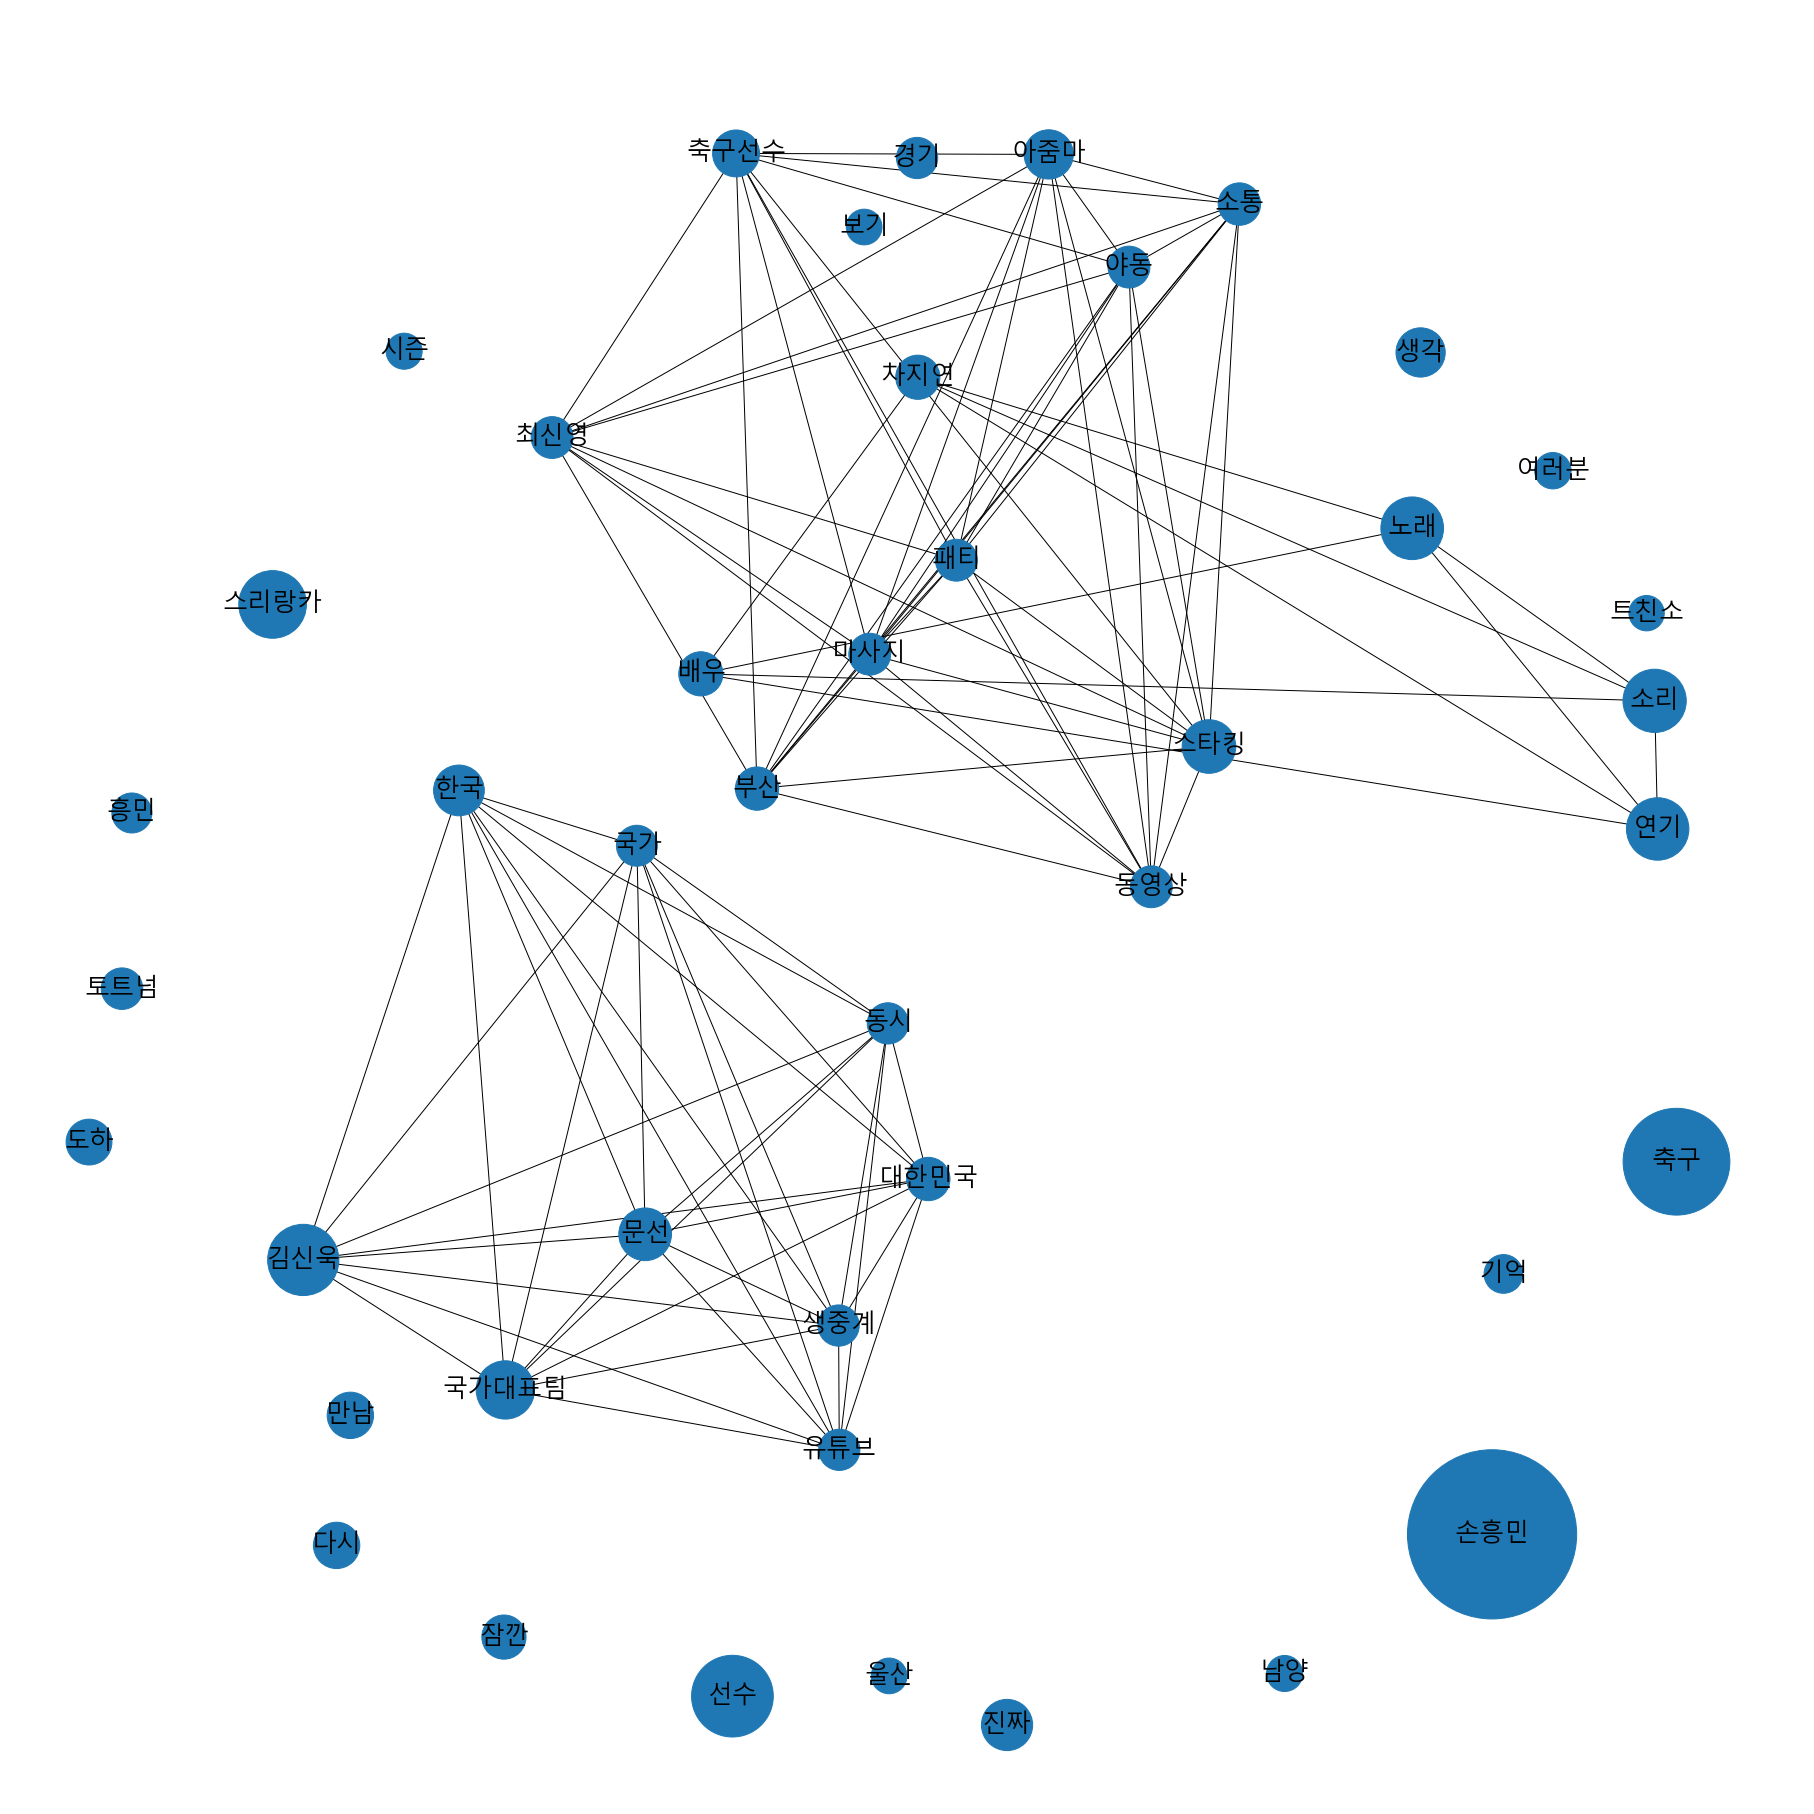

In [68]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()